<a href="https://colab.research.google.com/github/fontanadaniel11/Geopandas/blob/main/basi_geopandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gdp 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
countries = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers = gdp.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

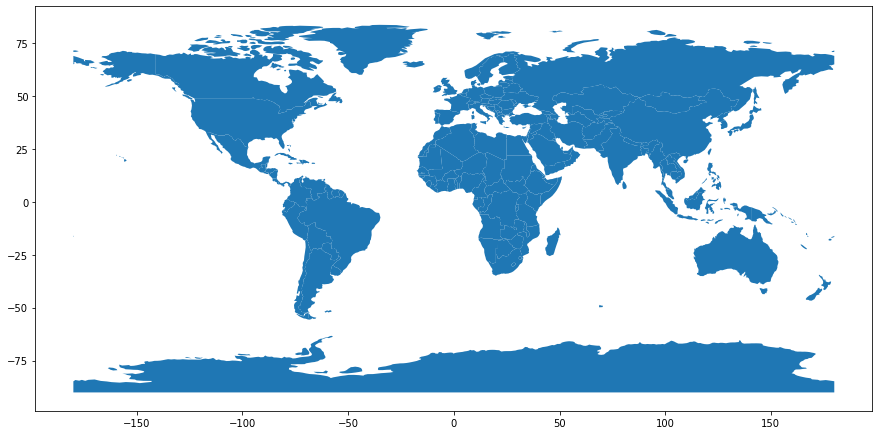

In [ ]:
countries.plot(figsize = (15,15))

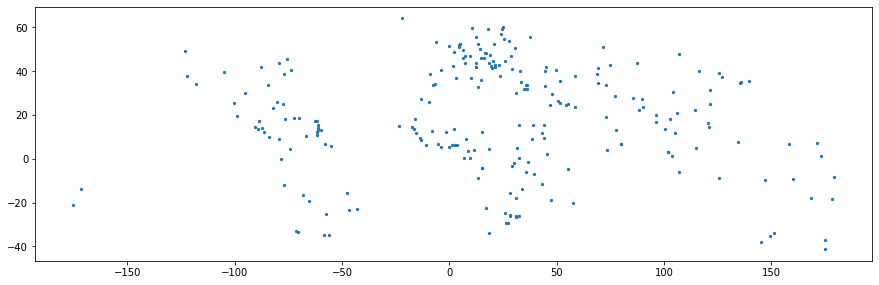

In [ ]:
cities.plot(figsize = (15, 15), markersize = 5)

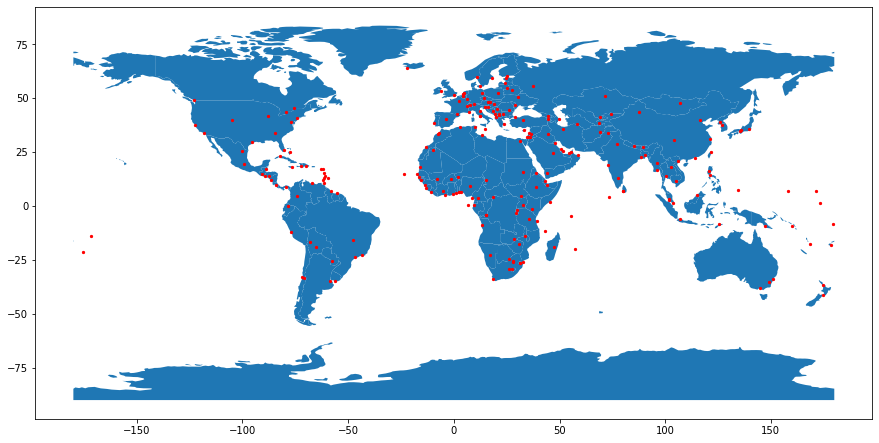

In [ ]:
ax = countries.plot(figsize = (15,15))
cities.plot(ax=ax, color = "red", markersize = 5)

In [ ]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].item()   #item serve per estrarre l'oggetto del belgio (in questo caso). Mostra la figura geometrica

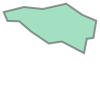

In [ ]:
belgium

In [ ]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].item()     #mostra un punto
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].item()

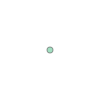

In [ ]:
paris

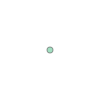

In [ ]:
brussels

In [ ]:
from shapely.geometry import LineString
line = LineString([paris, brussels])    #mostra una linea che parte dal punto di partenza al punto di arrivo (paris-brussels)

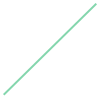

In [ ]:
line

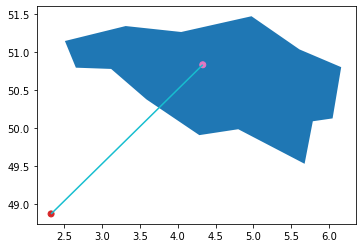

In [ ]:
gdp.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')   #mostra più figure geometriche conteporaneamente

In [ ]:
brussels.within(belgium) #controllo se bruxelles si trova in belgio

True

In [ ]:
belgium.contains(brussels)  #controllo se il belgio contiene bruxelles

True

In [ ]:
belgium.contains(paris)

False

In [ ]:
paris.within(belgium)

False

In [ ]:
belgium.contains(line)      #restituisce false perché la linea non è completamente contenuta nel belgio

False

In [ ]:
line.intersects(belgium)     #restituisce true perché la linea interseca (quindi attrversa) il belgio

True

In [ ]:
belgium.intersects(line)

True

In [ ]:
countries[countries.contains(paris)]   #trovo la nazione che contiene Parigi

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


In [ ]:
countries.contains(paris)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [ ]:
#tutte le città d'Italia
italy = countries.loc[countries["name"] == "Italy", "geometry"].item()
cities[cities.within(italy)]

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
226,Rome,POINT (12.48131 41.89790)


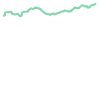

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.item()
amazon

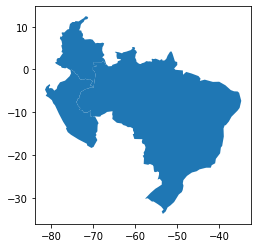

In [ ]:
countries[countries.crosses(amazon)].plot()   #gli stati che intersecano il fiume

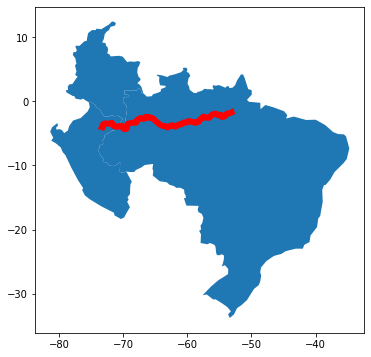

In [ ]:
ax = countries[countries.crosses(amazon)].plot(figsize = (12, 6)) 
amazon2 = rivers[rivers['name'] == 'Amazonas']
amazon2.plot(ax=ax, color= "red", linewidth = 6)   #linewidth: larghezza del fiume